*Editor: Weipeng*

*Last modified: 06/08/2024*

*Reference: Sundnes, Joakim. Solving Ordinary Differential Equations in Python. Springer Nature, 2024.*

A general form of ODEs can be written as: $$\begin{equation}u'(t)=f(t,u(t))\end{equation}$$

where $f(t,u)$ denote the *right hand side function*. To ensure a unique solution for (1), we need to specify the initial condition for $u$: 

$$\begin{equation}u(t_0)=u_0\end{equation}$$

The resulting *initial value problem (IVP)* can be expressed as:

$$\begin{equation}\begin{aligned}&u'(t)=f(t,u(t))\\&u(t_0)=u_0\end{aligned}\end{equation}$$

# The Forward Euler Method



At time $t_n$, we have the ODE:
$$\begin{equation}u'(t_n)=f(t_n,u(t_n))\end{equation}$$

We can use the *finite difference method (FDM)* to approximate the value of $u'(t)$ at time $t_n$:

$$\begin{equation}u'(t_n)\approx\frac{u(t_{n+1})-u(t_n)}{\Delta t}\end{equation}$$

By inserting the approximation, we can get an *explicit formula* for $u(t_{n+1})$:

$$u(t_{n+1})=u(t_n)+\Delta tf(t_n, u(t_n)))$$

This method is also known as *Forward Euler (FE) method* or the *Explicit Euler method*, which is the simplest numerical method for solving an ODE. The terms *explicit* lies in the fact that the update formula for $u(t_{n+1})$ only involves known quantities at time $t_n$.

Here we use the notation $u(t)$ to represent the numerical approximation to the exact solution $u(t)$ at $t_n$, and we consider a very simple PDE given by $u'=u$. The general solution is given by $u(t)=Ce^t$. The general update formula can be written as:

$$\begin{equation}u_{n+1}=u_n+\Delta tu_n=(1+\Delta t)u_n\end{equation}$$

The Python implementation of this algorithm is as follows:

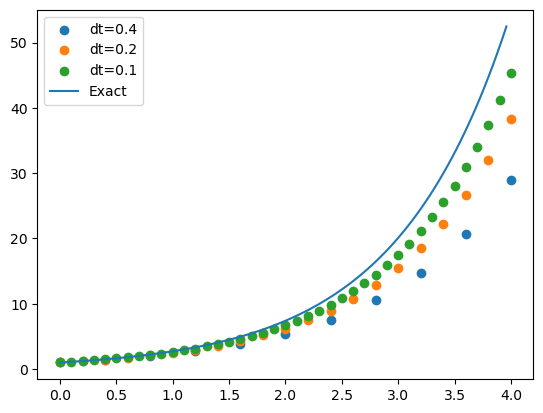

In [33]:
import numpy as onp
import matplotlib.pyplot as plt

def explicit_euler(f, u0, T, N):
    '''
    Solve u' = f(t,u), u(0) = u_0, with N steps from 0 to T
    
    '''
    dt = T/N
    t = onp.zeros(N+1)
    u = onp.zeros(N+1)
    u[0] = u0  # Importtant!
    for n in range(N):
        t[n+1] = t[n] + dt
        u[n+1] = u[n] + dt * f(t[n],u[n])
    return t, u

def f_ode(t, u):
    return u

T = 4   # total time
u0 = 1  # IV

# FE
nt = [10, 20, 40]
for i in nt:
    t, u = explicit_euler(f_ode, u0, T, i)
    plt.scatter(t,u, label=f'dt={T/i}')
# exp
t = onp.arange(0,T,T/100)
plt.plot(t, onp.exp(t), label='Exact')
plt.legend()

# The ODE solver Implemented as a Class

We can also implement the *Forward Euler method* as a class to increase the flexibility. Consider the model for logistic growth:

$$\begin{equation}u'(t) = \alpha u(t)(1-\frac{u(t)}{R}),\quad u(0)=u_0\end{equation}$$

Text(0.5, 1.0, 'Logistic growth')

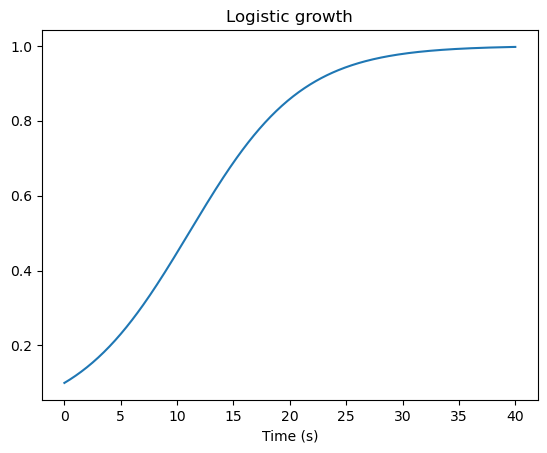

In [42]:
import numpy as onp

class Forward_Euler_v0():

    def __init__(self, f):
        self.f = f

    def set_initial_conditions(self, u0):
        self.u0 = u0

    def solve(self, t_span, N):
        self.dt = (t_span[1] - t_span[0])/N
        self.t = onp.zeros(N+1)
        self.u = onp.zeros(N+1)

        msg = "Please set initial condition before calling solve"
        assert hasattr(self, "u0"), msg

        self.t[0] = t_span[0]
        self.u[0] = self.u0

        for n in range(N):
            self.n = n
            self.t[n+1] = self.t[n] + self.dt
            self.u[n+1] = self.advance()

        return self.t, self.u

    def advance(self):
        n = self.n
        return self.u[n] + self.dt * self.f(self.t[n], self.u[n])


class Logistic:

    def __init__(self, alpha, R):
        self.alpha, self.R = alpha, float(R)

    def __call__(self, t, u):
        return self.alpha * u * (1 - u/self.R)
        
problem = Logistic(alpha = 0.2, R = 1.0)
solver = Forward_Euler_v0(problem)

u0=0.1
solver.set_initial_conditions(u0)
t, u = solver.solve(t_span=(0,40), N=400)

plt.plot(t,u)
plt.xlabel('Time (s)')
plt.title('Logistic growth')

# Systems of ODEs

For a system of ODEs with $m$ unkonwns $u^{(0)}(t),\,u^{(1)}(t),\, ...,\,u^{(m-1)}(t)$, the ODE system can be written as:

$$\begin{equation}u'=f(t,u),\quad u(t_0)=u_0\end{equation}$$

where $u = (u^{(0)},u^{(1)},...,u^{(m-1)})$ and $f = (f^{(0)},f^{(1)},...,f^{(m-1)})$ are vectors and vector-valued function. respectively.


## A ForwardEuler Class for Systems of ODEs

Here we consider a system of ODEs that models the motion of a simple *undamped pendulum*. This nonlinear system is formulated in terms of the angle $\theta$ and the angular velocity $w$. 

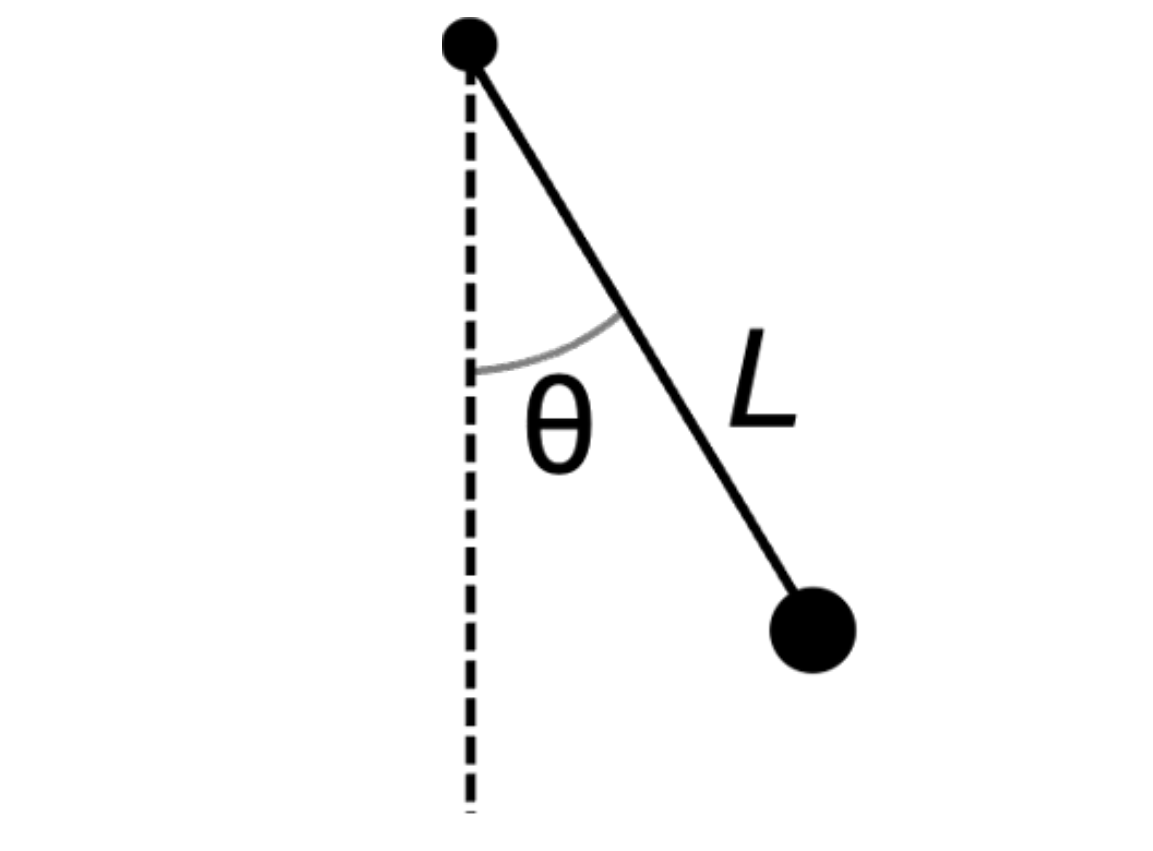
For a simple pendulum with no friction, the governing equations are as follows:

$$\begin{equation}\begin{aligned}&\frac{\partial\theta}{\partial t}=\omega\\&\frac{\partial\omega}{\partial t}=-\frac{g}{L}sin(\theta)\end{aligned}\end{equation}$$

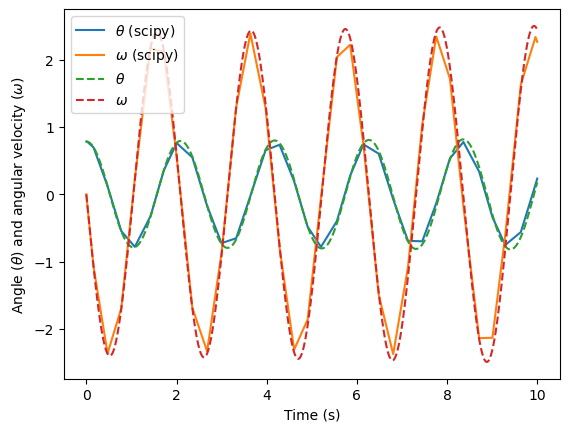

In [96]:
import numpy as onp
from scipy.integrate import solve_ivp

class Forward_Euler():

    def __init__(self, f):
        self.f = lambda t, u: onp.asarray(f(t,u), float)

    def set_initial_conditions(self, u0):
        self.u0 = onp.asarray(u0)
        self.neq = self.u0.size

    def solve(self, t_span, N):
        self.dt = (t_span[1] - t_span[0])/N
        self.t = onp.zeros(N+1)
        self.u = onp.zeros((N+1, self.neq))

        msg = "Please set initial condition before calling solve"
        assert hasattr(self, "u0"), msg

        self.t[0] = t_span[0]
        self.u[0,:] = self.u0

        for n in range(N):
            self.n = n
            self.t[n+1] = self.t[n] + self.dt
            self.u[n+1,:] = self.advance()

        return self.t, self.u

    def advance(self):
        n = self.n
        return self.u[n,:] + self.dt * self.f(self.t[n], self.u[n,:])


class Pendulum:

    def __init__(self, L, g=9.81):
        self.L = L
        self.g = g

    def __call__(self, t, u):
        theta, omega = u
        dtheta = omega
        domega = -self.g / self.L * onp.sin(theta)
        return [dtheta, domega]


u0 = [onp.pi/4., 0.]
problem = Pendulum(L=1)
solver = Forward_Euler(problem)
solver.set_initial_conditions(u0)

T = 10
N = 10000
t, u = solver.solve(t_span = (0, T), N=N)

# scipy
t_eval = onp.arange(0,T,T/N)
# solution = solve_ivp(problem, (0, T), u0, t_eval=t_eval, rtol=1e-6)
solution = solve_ivp(problem, (0, T), u0)

plt.plot(solution.t, solution.y[0,:], label=r'$\theta$ (scipy)')
plt.plot(solution.t, solution.y[1,:], label=r'$\omega$ (scipy)')
plt.plot(t, u[:, 0], linestyle = '--',label=r'$\theta$')
plt.plot(t, u[:, 1], linestyle = '--',label=r'$\omega$')
plt.xlabel('Time (s)')
plt.ylabel(r'Angle ($\theta$) and angular velocity ($\omega$)')
plt.legend()
plt.show()

# Checking the Error in the Numerical Solution

The Taylor expansion is an essential tool for estimating the error in numerical methods for ODEs. For a smooth function $\hat{u}(t)$, we can approximate the value at $t_n+\Delta t$ using the following series:

$$\begin{equation}\hat{u}(t_n+\Delta t)=\hat{u}(t_n)+\Delta t\hat{u}'(t_n)+\frac{\Delta t^2}{2}\hat{u}''+\frac{\Delta t^3}{6}\hat{u}'''(t_n)+\mathcal{O}(\Delta t^4)\end{equation}$$

Since $\Delta t$ is small, we always have $\Delta t^{(n+1)}\ll\Delta t^n$, so the error in the approximation is dominated by the first negelected term.

The update formula for the FE method can be written as:

$$u_{n+1} = u(t_n)+\Delta tu'(t_n)$$

which can be seen as a Taylor series truncated after the first order term. We expect the error $\vert u_{n+1}-\hat{u}_{n+1}\vert$ to be proportional to $\Delta x^2$. The accumulated error after $N \textasciitilde \frac{1}{\Delta t}$ steps is proportional to $\Delta t$. So, the FE method is a *first order* method.

We can use the following code to check the convergence:

In [106]:
# from P19

def rhs(t, u):
    return u
    
def exact(t):
    return onp.exp(t)
    
solver = Forward_Euler(rhs)
solver.set_initial_conditions(1.0)
T = 3.0
t_span = (0,T)
N = 30
print('Time step (dt) Error (e) e/dt')
for _ in range(10):
    t, u = solver.solve(t_span, N)
    dt = T / N
    e = float(abs(u[-1] - exact(T)))
    print(f'{dt:<14.7f} {e:<12.7f} {e/dt:5.4f}')
    N = N * 2

Time step (dt) Error (e) e/dt
0.1000000      2.6361347    26.3613
0.0500000      1.4063510    28.1270
0.0250000      0.7273871    29.0955
0.0125000      0.3700434    29.6035
0.0062500      0.1866483    29.8637
0.0031250      0.0937359    29.9955
0.0015625      0.0469715    30.0618
0.0007813      0.0235117    30.0950
0.0003906      0.0117624    30.1116
0.0001953      0.0058828    30.1200
